# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-08-02 19:00:39.847251


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/1/20


,8/1/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4620444,154447,3.34
Brazil,2707877,93563,3.46
Mexico,434193,47472,10.93
United Kingdom,305562,46278,15.15
India,1750723,37364,2.13
Italy,247832,35146,14.18
France,225198,30268,13.44


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 8/1/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
33386,US,4495015,2020-07-30,152055.0,1233.0,68033.0,65171.285714
33385,US,4426982,2020-07-29,150822.0,1448.0,70776.0,65265.857143
33384,US,4356206,2020-07-28,149374.0,1362.0,65869.0,65285.000000
33383,US,4290337,2020-07-27,148012.0,1077.0,56414.0,65094.285714
33382,US,4233923,2020-07-26,146935.0,470.0,54953.0,65809.000000
33381,US,4178970,2020-07-25,146465.0,905.0,66439.0,66793.857143
33380,US,4112531,2020-07-24,145560.0,1130.0,73715.0,66402.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/1/20


,8/1/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,415767,32694.0,7.86
New Jersey,182029,15830.0,8.70
California,506613,9345.0,1.84
Massachusetts,118040,8626.0,7.31
Illinois,181754,7700.0,4.24
Pennsylvania,117468,7219.0,6.15
Florida,480028,7022.0,1.46


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 8/1/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1155,California,492934,2020-07-30,9026.0,118.0,8021.0,8880.142857
1154,California,484913,2020-07-29,8908.0,229.0,14151.0,9089.571429
1153,California,470762,2020-07-28,8679.0,185.0,12641.0,8779.571429
1152,California,458121,2020-07-27,8494.0,46.0,5833.0,8607.285714
1151,California,452288,2020-07-26,8448.0,40.0,5836.0,9340.285714
1150,California,446452,2020-07-25,8408.0,71.0,6267.0,9386.714286
1149,California,440185,2020-07-24,8337.0,136.0,9412.0,9560.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 8/1/20


,8/1/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,190857,4669.0,2.45
Riverside,37011,695.0,1.88
Orange,36833,649.0,1.76
San Diego,29048,561.0,1.93
San Bernardino,32696,417.0,1.28
Imperial,9409,220.0,2.34
Santa Clara,10321,191.0,1.85


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 8/1/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3664,Los Angeles,186036,2020-07-30,4559.0,41.0,2580.0,2738.285714
3663,Los Angeles,183456,2020-07-29,4518.0,92.0,4814.0,2617.428571
3662,Los Angeles,178642,2020-07-28,4426.0,51.0,2614.0,2373.857143
3661,Los Angeles,176028,2020-07-27,4375.0,15.0,2011.0,2426.142857
3660,Los Angeles,174017,2020-07-26,4360.0,9.0,1692.0,2585.714286
3659,Los Angeles,172325,2020-07-25,4351.0,51.0,3390.0,2739.000000
3658,Los Angeles,168935,2020-07-24,4300.0,37.0,2067.0,2644.428571
3657,Los Angeles,166868,2020-07-23,4263.0,48.0,1734.0,2741.428571
3656,Los Angeles,165134,2020-07-22,4215.0,60.0,3109.0,3132.428571
3655,Los Angeles,162025,2020-07-21,4155.0,51.0,2980.0,3064.142857



7 day new US cases as of 8/1/20


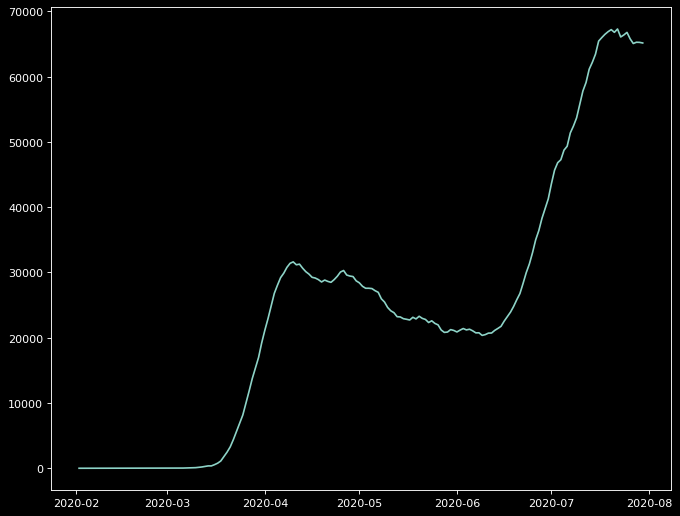

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 8/1/20


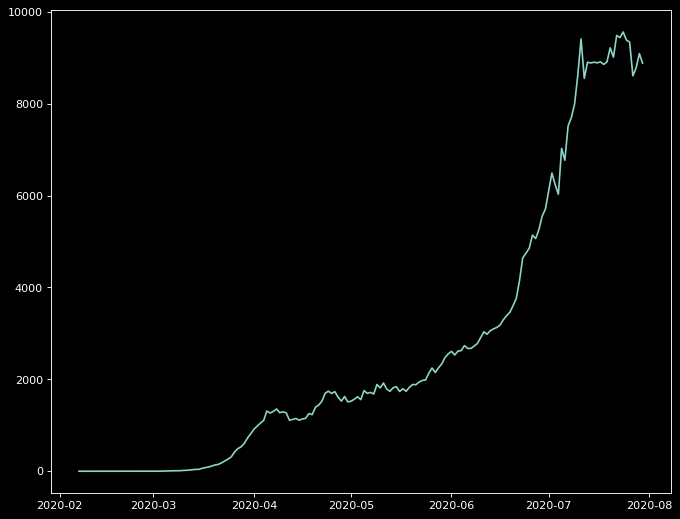

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 8/1/20


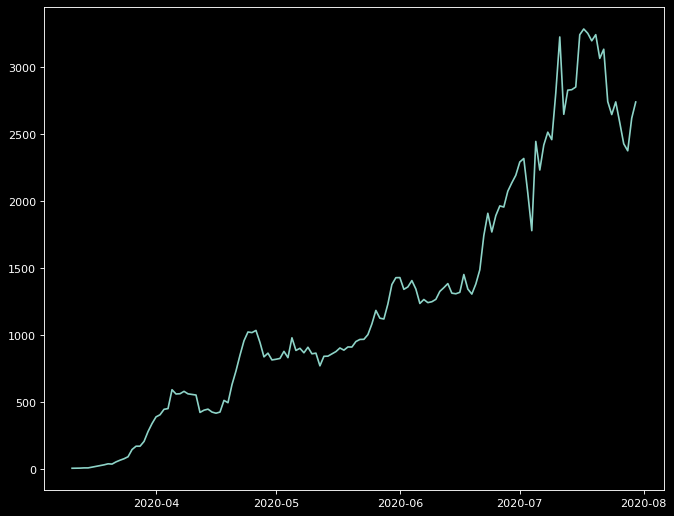

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()